# **Análisis de Sistemas Térmicos usando Python**

In [1]:
#pip install Coolprop

In [2]:
#pip install beautifultable

In [3]:
import CoolProp.CoolProp as cp
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo Bomba (Conservación de masa)

En este ejemplo, una bomba aumenta la presión del agua desde $70\, kPa$ hasta $700\, kPa$. El agua entra a $15 °C$ por un ducto de $1.5\, cm$ de diámetro. Se busca determinar la velocidad del agua en la entrada y salida si el flujo másico es $0.5\,kg/s$. Adicionalmente, ¿Cuál sería la velocidad si el agua está a $40 °C$

![pump.jpg](pump.jpg)

In [4]:
# Datos del problema
fluid = "Water"
m_dot_p = 0.5 # kg/s, Flujo másico en la bomba

# En la entrada
D_p_1 = 1.5e-2 # m, diámetro en la succión
A_p_1 = (np.pi*D_p_1**2)/4 # m2, Área en la succión
P_p_1 = 70e3 # Pa, Presión a la entrada de la bomba
T_p_1 = 15 + 273.15 # K, Temperatura a la entrada

# En la salida
P_p_2 = 700e3 # Pa, Presión a la salida de la bomba

Del balance de masa para un sistema abierto con una entrada y una salida, en estado estacionario tenemos:

$\dot{m}_1=\dot{m}_2$ 

Esto se puede reescribir en función de la densidad, velocidad y el área

$\rho_1V_1A_1=\rho_2V_2A_2$

De lo anterior, la velocidad de entrada en la bomba es:

In [5]:
rho_p_1 = cp.PropsSI('D', 'P', P_p_1, 'T', T_p_1, fluid) # kg/m3, Densidad en la entrada
V_p_1 = m_dot_p/(rho_p_1*A_p_1) # m/s, Velocidad a la entrada de la bomba
print('La velocidad del flujo a la entrada de la bomba: ',round(V_p_1,3),' [m/s]')

La velocidad del flujo a la entrada de la bomba:  2.832  [m/s]


Para calcular la velocidad a la salida de la bomba, como se desconoce el área, utilizamos el balance de energía general en sistemas abiertos:

$\dot{Q}_{in}+\dot{W}_{in}+\sum_{in}^{}\dot{m}\left ( h+\frac{V^{2}}{2}+gz \right )=\dot{Q}_{out}+\dot{W}_{out}+\sum_{out}^{}\dot{m}\left ( h+\frac{V^{2}}{2}+gz \right )$

Asumiendo una operación adibática, una sola entrada y salida, y considerando que el nivel de referencia $z$ no varía siginificativamente, el balance de energía pasa a ser:

$\dot{m}_1\left ( h_1+\frac{V_{1}^{2}}{2}\right )+\dot{W}_{in}=\dot{m}_2\left ( h_2+\frac{V_2^{2}}{2} \right )$ 

con $\dot{m}_1=\dot{m}_2$

En esta ecuación el trabajo $\dot{W}_{in}$ requerido en la bomba, en el caso de fluidos incompresibles, puede ser expresado como el producto de la diferencia de presión total $\Delta p$ y el caudal en la bomba $Q$ (en este caso asumimos que la eficiencia $\eta$ es 100%):

$\dot{W}_{in}=\frac{\Delta p \, Q}{\eta}$

Así, el caudal puede ser expresado como el cociente entre el flujo másico y la densidad ($Q=\frac{\dot{m}}{\rho}$). En el caso de las bombas se puede asumir generalmente variaciones muy pequeñas de densidad (fluido incompresible). Por tanto, la ecuación de energía dividiendo por el flujo másico, queda:

$\left ( h_1+\frac{V_{1}^{2}}{2}\right )+\frac{\Delta p }{\rho}=\left ( h_2+\frac{V_2^{2}}{2} \right )$

De la cual podemos obtener la velocidad a la salida $V_2$:

In [6]:
h_p_1 = cp.PropsSI('H', 'P', P_p_1, 'T', T_p_1, fluid) # J/kg, entalpía en la entrada de la bomba
# Para la entalpía a la salida usamos el supuesto de que la temperatura no varía significativamente
h_p_2 = cp.PropsSI('H', 'P', P_p_2, 'T', T_p_1, fluid) # J/kg, entalpía a la salida de la bomba

V_p_2 = (2*(h_p_1 + (V_p_1**2)/2 + (P_p_2-P_p_1)/rho_p_1 - h_p_2))**0.5 # m/s, velocidad a la salida de la bomba
A_p_2 = m_dot_p/(rho_p_1*V_p_2)
D_p_2 = ((A_p_2*4)/np.pi)**0.5
print('La velocidad del flujo a la salida de la bomba: ',round(V_p_2,3),' [m/s]')
print('Diámetro en la salida de la bomba: ',round(D_p_2*100,3),' [cm]')

La velocidad del flujo a la salida de la bomba:  7.95  [m/s]
Diámetro en la salida de la bomba:  0.895  [cm]


Si la temperatura a la entrada es $40°C$

In [7]:
T_p_1_b = 40 + 273.15
rho_p_1_b = cp.PropsSI('D', 'P', P_p_1, 'T', T_p_1_b, fluid) # kg/m3, Densidad en la entrada
V_p_1_b = m_dot_p/(rho_p_1_b*A_p_1) # m/s, Velocidad a la entrada de la bomba
print('La velocidad del flujo a la entrada de la bomba, caso b: ',round(V_p_1_b,3),' [m/s]')

h_p_1_b = cp.PropsSI('H', 'P', P_p_1, 'T', T_p_1_b, fluid) # J/kg, entalpía en la entrada de la bomba
# Para la entalpía a la salida usamos el supuesto de que la temperatura no varía significativamente
h_p_2_b = cp.PropsSI('H', 'P', P_p_2, 'T', T_p_1_b, fluid) # J/kg, entalpía a la salida de la bomba

V_p_2_b = (2*(h_p_1_b + (V_p_1_b**2)/2 + (P_p_2-P_p_1)/rho_p_1_b - h_p_2_b))**0.5 # m/s, velocidad a la salida de la bomba
print('La velocidad del flujo a la salida de la bomba, caso b: ',round(V_p_2_b,3),' [m/s]')

La velocidad del flujo a la entrada de la bomba, caso b:  2.852  [m/s]
La velocidad del flujo a la salida de la bomba, caso b:  12.713  [m/s]


## Ejemplo Turbina (Conservación de masa y energía)

En este ejemplo consideramos una turbina de vapor adiabática.

Las condiciones en la entrada de presión, temperatura y velocidad son:
*   $P_1= 6 \, [MPa]$
*   $T_1= 400 \, [C]$
*   $V_1= 80 \, [m/s]$

Las condiciones en la salida de presión, calidad y velocidad son:
*   $P_2= 40 \, [kPa]$
*   $x_2= 0.92 \, [-] $
*   $V_2= 50 \, [m/s]$

El flujo másico es $20\,[kg/s]$. Se busca determinar la ***potencia generada***, y adicionalmente estimar el ***cambio en la energía cinética*** y el ***área de salida de la turbina***.

![Tur.jpg](Tur.jpg)

In [8]:
# Se selecciona el fluido de trabajo y se inicializan las variables estado
# (Presión, Temperatura, Velocidad, calidad, entalpía)
fluid = "Water"
m_dot_t = 20 # kg/s
n_estados = 2
P_t,T_t,V_t,x_t,h_t,D_t = ([np.empty]*n_estados for i in range(6))
Estado = []

En la entrada de la turbina

In [9]:
Estado.append('Entrada')
P_t[0] = 6e6 # Pa
T_t[0] = 400 + 273.15 # K
V_t[0] = 80 # m/s
x_t[0] = cp.PropsSI('Q', 'P', P_t[0], 'T', T_t[0], fluid) # -
h_t[0] = cp.PropsSI('H', 'P', P_t[0], 'T', T_t[0], fluid) # J/kg

Verifiquemos la calidad en la entrada

In [10]:
print(x_t[0],' Este resultado indica que el agua está en estado sobrecalentado. Se verificará en el diagrama T-h más adelante')

-1.0  Este resultado indica que el agua está en estado sobrecalentado. Se verificará en el diagrama T-h más adelante


En la salida de la turbina

In [11]:
Estado.append('Salida')
P_t[1] = 40e3 # Pa
x_t[1] = 0.92 # -
V_t[1] = 50 # m/s
T_t[1] = cp.PropsSI('T', 'P', P_t[1], 'Q', x_t[1], fluid) # K
h_t[1] = cp.PropsSI('H', 'P', P_t[1], 'Q', x_t[1], fluid) # J/kg

Tomando en cuenta el balance de energía general

$\dot{Q}_{in}+\dot{W}_{in}+\sum_{in}^{}\dot{m}\left ( h+\frac{V^{2}}{2}+gz \right )=\dot{Q}_{out}+\dot{W}_{out}+\sum_{out}^{}\dot{m}\left ( h+\frac{V^{2}}{2}+gz \right )$

Con el supuesto de operación adibática, para uno sola entrada y salida, y considerando que el nivel de referencia $z$ no varía siginificativamente, el balance de energía pasa a ser

$\dot{m}_1\left ( h_1+\frac{V_{1}^{2}}{2}\right )=\dot{W}_{out}+\dot{m}_2\left ( h_2+\frac{V_2^{2}}{2} \right )$ con $\dot{m}_1=\dot{m}_2$

El cambio en la energía cinética sería

$\Delta Ec=\dot{m}\frac{V_{1}^{2}-V_2^{2}}{2}$


In [12]:
delta_ec = m_dot_t*(V_t[0]**2-V_t[1]**2)/2 # W
print('El cambio en la energía cinética es:',delta_ec/1e3,'[kW]')


El cambio en la energía cinética es: 39.0 [kW]


La potencia generada:

In [13]:
W_dot_out = m_dot_t*(h_t[0]-h_t[1]) + delta_ec
print('Potencia generada:',round(W_dot_out/1e3,3),'[kW]')

Potencia generada: 14592.407 [kW]


La contribución del cambio de energía cinética en la potencia generada es significativamente baja, en comparación con el cambio en la energía del flujo debido a la entalpía. Por esto, en el análisis termodinámico de turbinas no se tiene en cuenta el cambio en la energía cinética

In [14]:
print('Porcentaje contribución energía cinética en trabajo:',round(delta_ec*100/W_dot_out,3),'%')

Porcentaje contribución energía cinética en trabajo: 0.267 %


Del balance de masa para un sistema abierto con una entrada y una salida, en estado estacionario

$\dot{m}_1=\dot{m}_2$ que se puede reescribir en función de la densidad, velocidad de flujo y el área

$\rho_1V_1A_1=\rho_2V_2A_2$

De lo anterior, el área del ducto de descarga de la turbina es:

In [15]:
D_t[1] = cp.PropsSI('D', 'P', P_t[1], 'Q', x_t[1], fluid) # kg/m3
A_t_2 = m_dot_t/(D_t[1]*V_t[1]) # m2
print('Área de salida de la turbina:',round(A_t_2,4),'[m2]')
D_t[0] = cp.PropsSI('D', 'P', P_t[0], 'T', T_t[0], fluid) # kg/m3
A_t_1 = m_dot_t/(D_t[0]*V_t[0])
print('Área de entrada de la turbina:',round(A_t_1,4),'[m2]')

Área de salida de la turbina: 1.4694 [m2]
Área de entrada de la turbina: 0.0119 [m2]


Crearemos una Tabla de resumen de los estados termodinámicos

In [16]:
from beautifultable import BeautifulTable as bt

In [17]:
print('Estados termodinámicos - Turbina')
table = bt()
table = bt(maxwidth=100)
table.columns.append([x//1e3 for x in P_t], header="Presión\n[kPa]")
table.columns.append([x-273.15 for x in T_t], header="Temperatura\n[C]")
table.columns.append(V_t, header="Velocidad\n[m/s]")
table.columns.append(x_t, header="Calidad \n[-]")
table.columns.append([x//1e3 for x in h_t], header="Entalpía\n[kJ/kg]")
table.columns.append(D_t, header="Densidad\n[kg/m3]")

table.rows.header = Estado
print(table)

Estados termodinámicos - Turbina
+---------+---------+-------------+-----------+----------+----------+----------+
|         | Presión | Temperatura | Velocidad | Calidad  | Entalpía | Densidad |
|         |  [kPa]  |     [C]     |   [m/s]   |   [-]    | [kJ/kg]  | [kg/m3]  |
+---------+---------+-------------+-----------+----------+----------+----------+
| Entrada | 6000.0  |    400.0    |    80     |   -1.0   |  3178.0  |  21.088  |
+---------+---------+-------------+-----------+----------+----------+----------+
| Salida  |  40.0   |   75.857    |    50     |   0.92   |  2450.0  |  0.272   |
+---------+---------+-------------+-----------+----------+----------+----------+


En el diagrama Temperatura-Densidad podemos observar que a la entrada de la turbina el vapor está sobrecalentado, mientras que a la salida está en un estado de saturación con calidad del 92%

c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


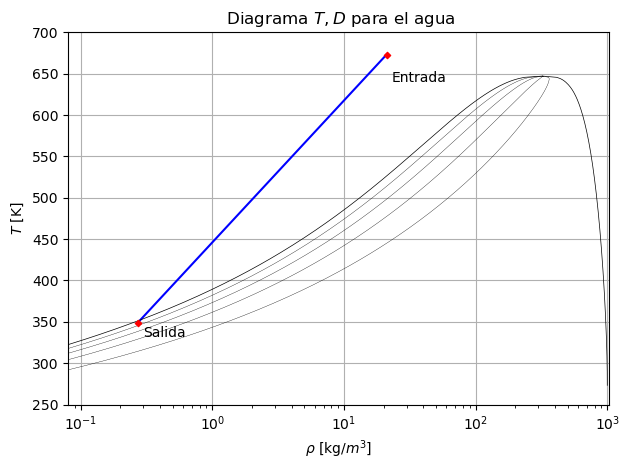

In [18]:
from CoolProp.Plots import PropertyPlot

td_plot = PropertyPlot('Water', 'TD', tp_limits='ORC', unit_system='SI')
td_plot.calc_isolines(cp.iQ, num=6)

ax = plt.gca() # Axis del PropertyPlot
ax.scatter(D_t,T_t,c='r',s=10,zorder=3,marker='D') # Puntos con los estado termodinámicos
e_v = 0.95 # Espaciamiento vertical
e_h = 1.1 # Espaciamiento horizontal
for i, txt in enumerate(Estado):
    plt.annotate(txt, (D_t[i]*e_h, T_t[i]*e_v))

from matplotlib.lines import Line2D

line = Line2D(D_t,T_t,color='b')
ax.add_line(line)

ax.set_ylim(250,700) # Modificar los límites 'ORC' en y
td_plot.title(r' Diagrama $T,D$ para el agua')
td_plot.xlabel(r'$\rho$ [kg/$m^3$]')
td_plot.ylabel(r'$T$ [K]')
td_plot.grid()
td_plot.show()